# Scikit-learn - скайкит лерн    ( Machine Learning )

включает:
- большинство алгоритмов машинного обучения 
- срез для предворительной обработки данных 
- тестовые датасеты 

### Обучение с учителем 

> с применением правильных данных для сравнения полученного результата обучения модели данных
после этого мы сможем пострить модель данных способную предсказывать правильный ответ для тех данных для которых правильного ответа 
нет

# <span style="color:blue">Линейная регрессия </span>

> <span style="color:blue">Предназначен для предсказывания непрерывной величины, к примеру цены на какой-либо товар, физической величины или иной подобной хар-ки</span>

> задачи предсказания подобной величины называется - регрессией

In [24]:
import numpy as np
import pandas as pd

##### Набор данных из библиотеки sklearn

> датасет содержаший цены на двежимость в Бостоне и различные признаки которые можно использовать для предсказания цены

In [25]:
from sklearn.datasets import load_boston

In [26]:
boston = load_boston()

##### Содержимое датасета ( признаки )

In [27]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [28]:
type(boston)

sklearn.utils.Bunch

In [29]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##### Данные о недвижимости

In [30]:
fname = boston.filename
fname

'/Users/vladislav/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [31]:
feature = boston.feature_names
feature

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
data = boston["data"]

In [46]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [34]:
data.shape

(506, 13)

In [35]:
data.size

6578

> <b>target</b> величина которую необходимо предсказать - это верное значение цены на объект недвижимости

In [36]:
target = boston["target"]

##### Названия признаков ( название колонок датафрейма )

In [51]:
boston_feature_names = boston.feature_names

In [52]:
boston_feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [92]:
# Значения признаков объекта недвижимости
boston_data = pd.DataFrame(data, columns=feature_names)

In [93]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [94]:
boston_data.shape

(506, 13)

In [95]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Ни в одном признаке нет пропущенных значений

In [96]:
# Целевая переменная с данными цены на недвижимость
true_price = pd.DataFrame(target, columns=['price'])

In [97]:
true_price

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [98]:
#true_price.info()
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Также нет пропущенных значений

## 02 Разбиение данных на тренировочный и тестовый датасеты

In [99]:
from sklearn.model_selection import train_test_split

###### Для построения модели необходимо как минимум две выборки

- Тренеровочная ( тестовая ) boston_data_train/true_price_train - для тренировки модели <br>
- Проверочная ( правильная цена ) boston_data_valid/true_price_valid - для сравнения правильности результата и определения насколько хорошо работет модель

Данные признаков - boston_data <br>
Данные целевой переменной - true_price

In [228]:
boston_data_train, boston_data_test, true_price_train, true_price_test = train_test_split(boston_data, true_price, test_size=0.10, random_state=40)
# 
# test_size - ДОЛЯ данных которую мы выбирем для теста
# random_state - повторимость случайного выбора, т.е. сколько раз мы возмем ДОЛЮ данных

In [229]:
boston_data_train.sort_index()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [230]:
boston_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 12 to 326
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     455 non-null    float64
 1   ZN       455 non-null    float64
 2   INDUS    455 non-null    float64
 3   CHAS     455 non-null    float64
 4   NOX      455 non-null    float64
 5   RM       455 non-null    float64
 6   AGE      455 non-null    float64
 7   DIS      455 non-null    float64
 8   RAD      455 non-null    float64
 9   TAX      455 non-null    float64
 10  PTRATIO  455 non-null    float64
 11  B        455 non-null    float64
 12  LSTAT    455 non-null    float64
dtypes: float64(13)
memory usage: 49.8 KB


In [231]:
boston_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 358 to 140
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     51 non-null     float64
 1   ZN       51 non-null     float64
 2   INDUS    51 non-null     float64
 3   CHAS     51 non-null     float64
 4   NOX      51 non-null     float64
 5   RM       51 non-null     float64
 6   AGE      51 non-null     float64
 7   DIS      51 non-null     float64
 8   RAD      51 non-null     float64
 9   TAX      51 non-null     float64
 10  PTRATIO  51 non-null     float64
 11  B        51 non-null     float64
 12  LSTAT    51 non-null     float64
dtypes: float64(13)
memory usage: 5.6 KB


In [232]:
#true_price_train.sort_index()
true_price_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 12 to 326
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   455 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [233]:
true_price_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 358 to 140
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   51 non-null     float64
dtypes: float64(1)
memory usage: 816.0 bytes


## 03 Построение модели линейно регрессии

In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
linear_r = LinearRegression()

Задача линейной регрессии - найти подходящтй коэффициент w при признаках x для вычисления целевой переменной y, <br>
минимизирую ошибку e <br>

## ${y} = {w}_{0} + {w}_{1} * {x}_{1} + {w}_{2} * {x}_{2} + {w}_{3} + ... + {w}_{n} * {w}_{n} + e $

#### Запустим тренировку модели ( построение модели )

> тренировка модели происходит с помощью функции <span style="color:green"><b>fit</b></span>

In [236]:
# Запуск обучения
linear_r.fit(boston_data_train, true_price_train) 

LinearRegression()

- x_train - признаки недвижимости
- y_train - цены на недвижимость

После пострения модели на тестовых данных, с помощью метода predict мы можем предсказать цену на недвижимость в тестовой выборке

In [237]:
price_predict = linear_r.predict(boston_data_train)

In [238]:
#y_pred

In [239]:
price_predict.shape

(455, 1)

Создадим датафрейм и поместим в него предсказанные и реальные данные, для определения насколько точны предсказания

In [240]:
check_test = pd.DataFrame(
    {'реальная_цена': true_price_train['price'], 
    'предположительная_цена': price_predict.flatten()
    }, 
    columns=['реальная_цена','предположительная_цена' ]
)

In [241]:
#check_test.head(10).sort_index()
check_test.head(10).head(10).sort_values('реальная_цена')

,реальная_цена,предположительная_цена
405,5.0,7.094047
418,8.8,5.348085
147,14.6,8.682296
310,16.1,18.398237
77,20.8,23.172453
44,21.2,22.995334
12,21.7,21.018799
221,21.7,23.731076
168,23.8,25.476992
163,50.0,41.427060


In [242]:
#check_test.loc[index]

Для того чтобы определить насколько точно мы предсказали цену необходимо применить метрики оценки качества

## 04 Метрики оценки качества регрессионной модели

>Средняя квадратичная ошибка - вычисляется как квадрат разности между реальной и предсказанной величиной

`Подсчет средней квадратичной ошибки в ручную:`

In [243]:
# Создадим новую колонку в DataFrame check_test содержащую разницу между реальной ценой и предсказанной
check_test['отклонение'] = check_test['реальная_цена'] - check_test['предположительная_цена']

In [244]:
check_test

,реальная_цена,предположительная_цена,отклонение
12,21.7,21.018799,0.681201
310,16.1,18.398237,-2.298237
405,5.0,7.094047,-2.094047
418,8.8,5.348085,3.451915
163,50.0,41.427060,8.572940
...,...,...,...
440,10.5,12.236045,-1.736045
165,25.0,24.446317,0.553683
7,27.1,19.236152,7.863848
219,23.0,29.212566,-6.212566


In [245]:
check_test.loc[(check_test['отклонение'] >= 0.0) & (check_test['отклонение'] <= 0.1)].sort_values('отклонение')

,реальная_цена,предположительная_цена,отклонение
335,21.1,21.077004,0.022996


In [246]:
#initial_mse_hands = (check_test['отклонение'] ** 2)

In [247]:
#initial_mse_hands

In [248]:
initial_mse_hands = (check_test['отклонение'] ** 2).mean()

In [249]:
initial_mse_hands

18.894906951501415

`Подсчет средней квадратичной ошибки с помощью функции mean_squared_error библиотеки sklearn :`

In [250]:
from sklearn.metrics import mean_squared_error

In [251]:
initial_mse = mean_squared_error(true_price_train, price_predict) # Первый аргумент реальная цена, второй предсказанная

In [252]:
initial_mse

18.894906951501405

In [253]:
if initial_mse == initial_mse_hands:
    print('equil')

In [254]:
print(f'Квадратичное отклонение: \nПодсчитано вручную: {initial_mse_hands} \nПодсчитано с sklearn: {initial_mse}')

Квадратичное отклонение: 
Подсчитано вручную: 18.894906951501415 
Подсчитано с sklearn: 18.894906951501405


> Средняя абсолютная ошибка - вычисляется как средняя модулей разноcти между реальной и предсказанной ценой <br>
<span style="color:red">не сильно реагирует на выбросы в данных ( сильно завышена или занижена цена )</span>

In [255]:
from sklearn.metrics import mean_absolute_error

In [256]:
mean_absolute_error(true_price_train, price_predict)

3.0432039908604653

> ${R}_{2}$ <br>
<span style="color:red">значение не зависит от предсказанной величины,её значение никогда не превышает единицу (1)</span><br>
чем ближе значение к единице, тем лучше работает модель

In [262]:
from sklearn.metrics import r2_score

In [263]:
r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined

## 05 Просмотр коэффициентов линейной регрессии

${w}_{0}$ - свободный коэффициент который не домножается ни на какую переменную ( смотри формулу выше ) <br>
<span style="color:red">такой коэффициент называется интерсепт</span>

In [257]:
lr.intercept_

array([22.48865435])


${w}_{1}...{w}_{m}$ <br>
<br>
остальные коэффициенты можно посмотреть:

>Коэффициент  Например, в уравнении $y = ax^{2}+bx+c$, $a$ - является коэффициентом $x^{2}$, $b$ – коэффициентом $х$, а $с$ – постоянным членом ( К примеру коэффицент скорости, ускорения )

In [258]:
lr.coef_

array([[-0.63039343,  0.78310442, -0.22527609,  0.74892343, -1.97315411,
         2.35205174, -0.07688676, -2.87670685,  2.27347607, -1.71320869,
        -1.81331966,  0.58741182, -3.50944199]])

> Оценим визуально величину коэффициентов для каждого признака

In [259]:
import matplotlib.pyplot as plt

In [260]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Название признака')

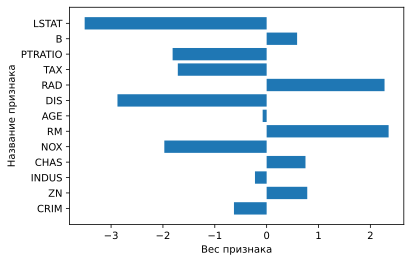

In [261]:
plt.barh(boston_data_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Название признака')

> !!! по данным признакам мы не можем определить вклад каждого признака в итоговую цену!!! <br>
т.к. признаки не масштабированы и имеют разный масштаб значений

## 06 Стандартизация признаков

> от значения признака отнимается средняя по данному признаку и делиться на среднеквадратичное отклонение

${X}_{scaled} =  \Bigg[\frac{ x - {x}_{mean}} {\sigma_{x}}\Bigg] $

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
# создаем объект scaler, с помощью него будем стандартизировать признаки
scaler = StandardScaler()

In [184]:
# вычисляем среднее значение и среднеквадратичное значение для каждого признаков в датафрейме 
# и сразу вычиляем стандартизированное значение для каждого признака
boston_data_train_scaled = scaler.fit_transform(boston_data_train)

In [187]:
type(boston_data_train_scaled)

numpy.ndarray

In [188]:
boston_data_train_scaled.shape

(379, 13)

In [189]:
# создаем из массива numpy датафрейм
boston_data_train_scaled = pd.DataFrame(boston_data_train_scaled, columns=boston_data_train.columns)

In [190]:
# применяем стандартизацию к датафрейму x_test
boston_data_test_scaled = scaler.transform(boston_data_test)

In [191]:
# получаем массив в котором каждый признак стандартизирован с помощью среднего значения 
# и среднеквадратичного отклонения вычисленных на тренеровочной выборке
type(boston_data_test_scaled)

numpy.ndarray

In [192]:
boston_data_test_scaled = pd.DataFrame(boston_data_test_scaled, columns=boston_data_test.columns)

In [193]:
boston_data_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.397841,-0.504456,1.042276,3.684688,1.933374,-0.256333,0.551440,-0.550762,1.740699,1.585865,0.813598,0.425956,-0.114403
1,-0.468914,3.016114,-1.373737,-0.271393,-1.260443,1.239272,-1.121584,1.664444,-0.848303,-0.436919,-2.852684,-0.027547,-0.555789
2,-0.434075,-0.504456,-0.588314,-0.271393,-0.876486,-1.367354,0.976846,0.969400,-0.730621,-1.013142,-0.295935,0.442168,2.858416
3,0.652726,-0.504456,1.042276,-0.271393,1.435977,0.692918,0.880325,-0.743530,1.740699,1.585865,0.813598,-3.931624,0.802203
4,1.721625,-0.504456,1.042276,-0.271393,0.275382,-0.888150,-0.403042,-0.501979,1.740699,1.585865,0.813598,0.442168,0.390038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-0.473886,3.456186,-1.300878,-0.271393,-1.208085,0.660870,-1.139458,3.991322,-0.495258,-1.289249,-0.730100,0.304970,-1.187879
123,1.091789,-0.504456,1.042276,-0.271393,1.435977,-0.167818,1.098390,-0.773476,1.740699,1.585865,0.813598,0.442168,0.908320
124,-0.373938,0.375686,-1.016727,-0.271393,0.860042,3.676498,0.676559,-0.995948,-0.495258,-0.827070,-2.659721,0.362761,-1.092527
125,1.243768,-0.504456,1.042276,-0.271393,0.572075,-0.167818,1.026893,-0.817478,1.740699,1.585865,0.813598,0.252473,0.892941


In [194]:
# Пострим новую модель на основе стандартизированных признаков
lr.fit(boston_data_train_scaled, true_price_train)

LinearRegression()

Text(0, 0.5, 'Название признака')

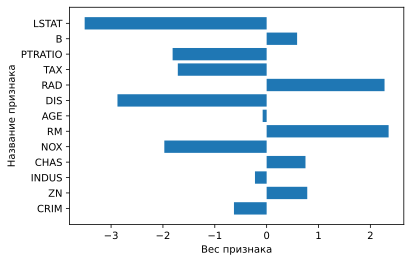

In [196]:
plt.barh(boston_data_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Название признака')

In [ ]:
# Уберем из выборки признаки значение которых близки к нулю INDUS и AGE
feats = [x for x in feature_names]
feats

In [ ]:
# Убираем признаки AGE и INDUS т.к. у этих признаков судя по графику самые низкие веса
feats.remove('INDUS')
feats.remove('AGE')
feats

In [ ]:
# Создадим функцию которая создает модель на тренеровочных данных и проверяет на реальных данных, 
# затем возвращает среднеквадратичную ошибку
def create_model(x_train, y_train, x_test, y_test, feats, model):
    '''
    args:
    x_train, y_train, x_test, y_test - данные
    feats - список признаков
    model - Модель
    return: 
    mse - среднеквадратичное отклонение (ошибка)
    '''
    model.fit(x_train.loc[:, feats], y_train)
    y_pred = model.predict(x_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [ ]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, feats, LinearRegression())

In [ ]:
# сверяем с исходным отклонением
initial_mse

In [ ]:
# убрав несколько признаков, отклонение немного уменьшилось 

> Для того чтобы постоить хрошую модель нужно подобрать и обработать признаки, а также справиться с проблемой переобучения. <br>
Данная проблема возникает когда модель хорошо работает на тех данных на которых она была построена, но плохо предсказывает на новых данных.
<br>
<br>
Одним из решений является регуляризация


## 07 Модели линейной регрессии с регуляризацией

In [ ]:
from sklearn.linear_model import Lasso, Ridge 

> класс <b>Lasso</b> - линейная регрессия с L1-регуляризацией <br>
класс <b>Ridge</b> - линейная регрессия с L2-регуляризацией

#### Lasso

In [ ]:
model_lasso = Lasso(alpha=0.003) 
# при помощи аргумента alpha мы можем влиять на степень регуляризации и тем сильнее мы боремся с переобучением

> оба класса имеют похожий интефейс ( набор функций ) с LenearRegression такие как fit и predict

In [ ]:
model_lasso_result = create_model(x_train_scaled, y_train, x_test_scaled, y_test, feats, model_lasso )
model_lasso_result

In [ ]:
initial_mse

In [ ]:
initial_mse_hands

#### Ridge ( гребень )

In [ ]:
model_ridge = Ridge(alpha=0.001)

In [ ]:
model_ridge_result = create_model(x_train_scaled, y_train, x_test_scaled, y_test, feats, model_ridge )
model_ridge_result

In [ ]:
model_lasso_result

In [ ]:
model_ridge_result

In [ ]:
initial_mse

>  При использовании регуляризации веса признаком понижают свое обсолютное значение, <br>
!!! <b>этим устранияется одна из причин переобучения - бесконтрольный рост коэффициентов</b> !!! <br>
чем выше коэффициент alpha тем ближе к нулю располагаются веса


In [ ]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
alpha_list[3]
for i, val in enumerate(alpha_list):
    print(f"i: {i}, val: {val}")
    lasso = Lasso(alpha = val)
    lasso.fit(x_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()
    

In [ ]:
from pylab import rcParams
rcParams["figure.figsize"] = 10, 5

for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание аболютных значений весов признаков \nпри увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
#plt.legend?
plt.legend(feats, loc='center right')

> Такой эффект Lasso регресси иногда используются для отбора признаков т.к. незначительные признаки обнуляются на мегьших значениях alpha

In [ ]:
n = 66
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 3.5, n)
alpha_list[3]
for i, val in enumerate(alpha_list):
    #print(f"i: {i}, val: {val}")
    ridge = Ridge(alpha = val)
    ridge.fit(x_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = ridge.coef_.flatten()

# Определяем размер полотна
from pylab import rcParams
rcParams["figure.figsize"] = 10, 5

for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание аболютных значений весов признаков \nпри увеличении коэффициента регуляризации alpha (Ridge)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
#plt.legend?
plt.legend(feats, loc='center right')

> При использании Ridge регрессии веса признаков по модулю также снижаютс, но делают это более плавно

# <span style="color:blue">Обучение с учителем Scikit-Learn

# <span style="color:blue">Логистическая регрессия </span>

## 01 Применение логистической регрессии

> Логистическая регрессия - это один из самых простых признаков классификации, <br>
в бинарной класификации два класса 0 и 1, одно событие обозначается нулем другое единицей <br>
Когда мы применяем модель логистической регресси мы определяем вероятность, далее значение вероятно можно огруглить, т.е. если вероятно меньше 0.5 то это вероятность 0, а если больше или равно то 1 

> Не используется для решения задач регресси, а только для классификации <br>
тем не менее задача алгоритма таже подобрать подходящие (оптимальные) веса для признаков

Задача алгоритма логистической регрессии - найти подходящие коэффициенты w при признаках x:

$z = {w}_{0} + {w}_{1} + {w}_{2} * {x}_{2} + ... + {w}_{m} * {w}_{m}$

Величина z помещается в сигмоидную функцию для вычисления вероятности:

$f_(x)=\Bigg[\frac{1}{1 + {e}_{-z}}\Bigg]$

Значение f(x) будет расположено на отрезке [0, 1]

f(x) - вероятность отнесения события к классу 1

1 - f(x) -вероятность отнесения события к классу 0

### Log loss

> чем более подходящие веса для логистической регресси подбираем тем ниже функция потерь, которая широко применяется для задач бинарной классификации

> Чем ниже logloss тем более точные ответы мы получаем используя логистическую регрессию, при идеальных ответах log loss = 0 ( на практике такого не бывает ), если модель плозая log loss стремиться к бесконечности

> log loss для логистической регресси тоже самое, что среднеквадратичная ошибка для линейной регрессии

$logloss = -y * ln(p) - (1 - y) * ln(1 -p )$

- y - правильный ответ или истинное значение ( 0 или 1 ), в зависимости от отго к какому классу относиться событие
- p - это то что мы получаем в результате нашего алгоритма, точ то выше обозначили как f(x) т.е. вероятность

> чем лучше наш алгоритм тем p ближе к значению y и тем ниже logloss

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

#### Подгрузим датасет с информацие о пасажирах титаника

<a> https://www.kaggle.com/c/titanic/data </a>

In [ ]:
data = pd.read_csv('kaagle_data/titanic_data_train.csv')

In [ ]:
data

In [ ]:
data.keys()

In [ ]:
data = data.set_index('PassengerId')

In [ ]:
data

##### Задача - поределить признак Survived ( целевая переменная ), выжил-ли пасажир при крушении
- 0 - утонул
- 1 - выжил

In [ ]:
target = 'Survived'
y = data[target] # Series содержит столбец Survived
x = data.drop(target, axis=1) # Датасет без признака целевой переменной Survived

##### Изучение качества данных

> По необходимости поработаем над очисткой данных

In [ ]:
x.info()

Видим что не все поля полностью заполнены:
- Cabin - заполнено всего 204 поля из 891
- Age - заполнено 714 поля из 891
- Embarked - заполнено 889 из 891

In [ ]:
# Удалем не интересующие нас столбцы ( хотя признак Cabin очень интересен расположением до палубы )
x = x.drop(['Cabin', 'Ticket', 'Name'], axis=1)

In [ ]:
# В поле Age 20% полей не заполнены, заполним их средним возрастом
mean_age = x['Age'].mean()

In [ ]:
mean_age

In [ ]:
x['Age'] = x['Age'].fillna(mean_age)

В поле Emarked проущены всего два поля и оно является строковым, заполним из чаше всего встречающимися значениями ( модой )

In [ ]:
emb = x['Embarked'].value_counts()
emb

In [ ]:
type(emb)

In [ ]:
emb.idxmax()

In [ ]:
x['Embarked'] = x['Embarked'].fillna(emb.idxmax())

In [ ]:
x.info()

 Признак Sex является категориальным ( от слова категория ) т.к. в ней два класса male и female. Проеобразуем пловой категориальный признак Sex из строкового в числовой male = 0, female = 1

In [ ]:
x['Sex'].value_counts()

In [ ]:
x['Sex'] = ( x['Sex'] == 'female').astype(int)

In [ ]:
x['Sex'].value_counts()

Признак Embarked также категориальный и имее три класса, преобразуем его в dummy-переменные.<br>
Создадим отдельные колонки с названиями категорий и будем хранить в них принадлежность пасажира к этой категории, 1 принадлежит, 0 не принадлежит

In [ ]:
# т.к. единственный сне числовой столбец остался Ebarked то функция get_dummies будет рпименен только к нему
x = pd.get_dummies(x)

In [ ]:
x.columns

Видим что колнка Embarked удлаилась6 но появились три новые колонки 'Embarked_C','Embarked_Q', 'Embarked_S'

In [ ]:
x.info()

Видим что теперь все поля датасета заполнены

In [ ]:
x.head()

Признак Pclass является числовым, но не колличественным и особой разницы для нас она не несет, поэтому преобразуем ее сначала в категориальный ( category )  признак, а затем в dummy
- !!! Вопрос !!! как можно определить какой тип у признака

In [ ]:
x['Pclass'].unique()

In [ ]:
x['Pclass'] = x['Pclass'].astype('category')

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.columns

In [ ]:
x.head(10)

In [ ]:
x.info()

#### Какова цель разбиения данных на валидационный, тестовый и тренировочный датасеты

В этот раз мы разобъем данные из файла train.csv на две части:
- тренировочный набор данных x_triain и y_train
- валидационный набор данных x_valid и y_valid <br>
На тренировочном датасете будем стоить модель, а на валидационном датасете проверять её качество <br>
После проверки на валидационном датасете модно будет проверить модель на тестовом датасете test.csv ( скачать с kaggle ) <br>
Полсе чего можно опубликовать результат на kaggle =)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

#### Построение модели

Для начала построим простую модель <br>
Затем будем сранвнивать качесво новых моделей с ней

In [ ]:
x_train.info()

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
y_pred = lr.predict(x_valid)

In [ ]:
y_pred

Для подсчета доли правильных ответов подгрузим функцию accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
log_reress_acuuracy_valid = accuracy_score(y_valid, y_pred)
log_reress_acuuracy_valid

Сделаем предсказание на тренировочном датасете

In [ ]:
y_pred_train = lr.predict(x_train)

In [ ]:
log_reress_acuuracy_train = accuracy_score(y_train, y_pred_train)
log_reress_acuuracy_train

> На тренеровочном датасете этот показатель выше, возможно это из-за небольшого переобучения

Методом <b> predict </b> мы вычисляли Классы событий <br>
Метод <b> predict_probe </b> вычисляет вероятность собыитя 0 или 1

#### Получение вероятности события

In [ ]:
y_proba = lr.predict_proba(x_valid)

In [ ]:
# Вероятность события для каждого пассажира
y_proba

Вернется массив событий первый столбец - это вес вероятности 0, второй это вес вероятности 1
Первый столбец вероятности события 0, второй столбец веротяности события 1 <br>
нас интересует вероятность события 1 ( правый стобец ) - при получении ответа значения из него округляются до 0 или до 1

In [ ]:
y_proba[0]

In [ ]:
lr.classes_

#### Сохраняем данные

In [ ]:
x_train.to_pickle('x_train.pkl')
y_train.to_pickle('y_train.pkl')

x_valid.to_pickle('x_valid.pkl')
y_valid.to_pickle('y_valid.pkl')

In [ ]:
!ls -l

# <span style="color:blue">Обучение с учителем Scikit-Learn

# <span style="color:blue">Support Vector Machine </span>

Suuport Vector Machene - или метод опорных векторов один из самых известных методов машинного обучения он включает в себя несколько алогритмов с помощью них можно решать задачи классификации, либо здачи регрессии.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.svm import SVC # Support Vector Cliassifire
# С помощью этого класса можно строить МОДЕЛИ КЛАССИФИКАЦИЙ на основе метода Support Vector Machine

In [ ]:
x_train = pd.read_pickle('x_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [ ]:
x_valid = pd.read_pickle('x_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

> Алгоритмы Support Vector Machine чуствиетльны к ненормализованным и нестандартизованным данным

Прежде чем начать строить модели на основе алгоритмов Support Vector Machine мы должны привести все признаки к похожему масштабу, <br> 
т.е. применить стандартизация или нормализацию.
- при стандартизации мы отнимали от значения признака среднее  значение по данному признаку затем делили на среднеквадратичное отклонение ( standart_scaler )
- в этот раз мы применим нормализацию

#### Нормализация данных

> С помощью нормализации значения признаков буду приведены к такому виду, что минимальное значение признаков в тренеровочном датасете  будет равно нулю, а максимольное единице.

Воспользуемся классом MinMaxScaler из модуля sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_train.head(10)

Посмотрим на статистические показатели признаков

In [ ]:
x_train.describe()

 Можно заметить, что большая часть признаков это dummy переменные принимающие значение 0 или 1, с ними ничего делать не нужно они уже считаются нормализованными

К примеру признак Age не является нормализованным т.к. его минимальное значение не равны 0 а максимальные на равны 1

Создадим массив со списком ненормализованных признаков

In [ ]:
x_train.keys()

In [ ]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

Применим метод fit_transform объекта MinMaxScaler для нормализации признаков и запишем нормализованные значения <br> в место старых значений этих признаков

In [ ]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

In [ ]:
x_train.head(10)

In [ ]:
x_train.describe()

Теперь применим метод trasform к валидационным данным

In [ ]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])

In [ ]:
x_valid.describe()

> Видим что не у всех признаков минимальное значение равно 0 а максимальное 1 <br>
Это в полне нормальное явление, т.к. мы настравивали нормализацию по датафрейму x_train, т.е. применяли метод fit или fit_rtansform именно там, а на валидационном датафрейме применили только метод transform и теперь данные в этом датасете нормализованы согласованно. Просто в датафрейме x_valid не нашлись такиезе минимальные и максмальные значения как в датафреме x_train. <br>
!!! Главное что одинаковые значения какого-либо признака после нормализации равны одному и томуже числу не зависимо от того в каком датасете они находяться!!! <br>

> При этом датасет x_valid должен нормализовываться по датасету x_train, т.к. именно на датасете x_train будет производиться обучение модели <br>

> В дальнейшем если у нас появяться новые данные мы долдны будем использовать нормализацию полученную на датафрейме x_train, можно каждый раз подгружать датафрейм x_train и применять метод fit чтобы создать модель нормализации, но также можно сохранять настроенную модель в файл, чтобы затем из этого файла читать, применять метод fit в таком случе будет уже не нужно, а нужно будет применить только метод transform 

#### Созранение модели нормализации в файл и загрузка из файла

In [ ]:
#from sklearn.externals import joblib # устаревший спопоб иморта библиотеки
import joblib

Для сохранения модели нормализации в файл воспользуемся методом dump

In [ ]:
joblib.dump(scaler, 'min_max_scaler.pkl')

Для загрузки модели нормализации из файла воспользуемся методом load

In [ ]:
scaler = joblib.load('min_max_scaler.pkl')

С помощью объекта sacaler, примениф метод transform мы можем нормализовать признаки, перечисленные в массиве cols_for_scale, созданный ранее

> Другие модели можно точно также сохранять в файл и загружать из файла

 #### Приступим к построению модели SVC ( Support Vector Cliassifire )

In [ ]:
clf = SVC() # объект с помощью которого мы будем производить класификацию

In [ ]:
clf.fit(x_train, y_train) # применим метод fit к тренировочным данным

In [ ]:
y_pred = clf.predict(x_valid) # Сделаем предсказания на валидационных данных

Также чтобы не было переобучения, сделаем прдесказания на основе тренировочных данных

In [ ]:
y_pred_train = clf.predict(x_train)

#### Оценим Accuracy ( точность )

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_valid, y_pred)

In [ ]:
accuracy_score(y_train, y_pred_train)

Мы получили более низкий показатель accuracy чем на предущем уроке когда использовали логистическую регрессию

In [ ]:
log_reress_acuuracy_valid

In [ ]:
log_reress_acuuracy_train

#### Тюнинг модели SVC ( Support Vector Cliassifire )

In [ ]:
c_vals = np.logspace(-2,5,29)

In [ ]:
c_vals

До этого модель SVC мы использовали с дефолтными параметрами, проведем тонкую настройку параметра C по умолчанию = 1

> Параметр C - шрафует за ошибку классификации

Создадим несколько значений параметра C, возьмем 29 значений из списка степеней 10ти от -2 до 5

In [ ]:
c_vals = np.logspace(-2,5,29)

модель SVC будет запускаться 29 с разными значениями С, параддедьно будем собирать данные для графика

In [ ]:
accuracy_valid = []
accuracy_train = []
for val in c_vals:
    clf = SVC(C=val)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'C = {val}\n\tacc_valid = {acc_valid}\n\tacc_train = {acc_train}')
    

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [ ]:
plt.plot(c_vals, accuracy_valid)
plt.plot(c_vals, accuracy_train)
plt.xlabel('Значение параметра С')
plt.ylabel("Accurancy")
plt.legend(['valid', 'train'])

Accuracy на тренировочных данных растет, а на валидационных данных сначала растет и на определенном значении начинает падать. <br>
В итоге видим что максмальное значение accuracy достигнуто примерно в райно значений от 500 до 1000

# <span style="color:blue">Обучение с учителем Scikit-Learn

# <span style="color:blue">KNN ( k-nearest neighbors или К - ближайших соседей )  </span>

> Считается одним из самых простых для понимания методов в машинном обучении

Если представить кадый объект который мы хотим классифицировать или решить для него задачу регрессии как точку в пространстве признаков, то можно предположить что целевая переменная этой точки будет близка по значения к целевой переменной соседних точек и если целевая переменная соседних точек известна можно приблизительно вычислить её и для данного объекта, применив что-то наподобии усреднения, такой принцип используется в объектах KNeighborsRegression и KNeighborsClassifaer, с помощью которых можно решать вопросы регресси и классификации

#### Разберем классификацию с помощью класса KNeighbrosClassifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train = pd.read_pickle('x_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [ ]:
x_valid = pd.read_pickle('x_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

Т.к. применяя KNN мы ищем соседние точки, то важно чтобы мы предварительно отмасштабирвали признаки, чтобы каждый признак вносил соизмеримый вклад в расстояние между точками

#### Масштабирование признаков с использование RbustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

Создадим список столбцов нуждающихся в масштабировании

In [ ]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
scaler = RobustScaler()

In [ ]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

RobustScaler масштабирует признаки минимизируя влияние выбросов в данных, это достигается за счет того, что при масштабировании применяется медиана по данному признаку и интерквартильный размах, т.е. расстояние между первой и третей квртилью. <br>
- первая квартиль - это значение признака такое, что если взять все объекты из выборки с меньшим значением, то это будет 25% выборки
- третья квартиль - это значение признака такое что все объекты ниже этого значнеия это 75% выборки <br>
<br>
Таким образом у 55% всей выборки значение признака находиться между первой и третьей квартилями

In [ ]:
x_train.describe()

#### Классификация c помошью KNN

Основной параметр KNN без настройки которого не обойтись - это n_neighbors - кол-во соседей по умолчанию = 5, кол-во соседей должно быть обязательно целым числом. Чем меньше соседей мы берем тем вероятнее переобучение и наоборот при увеличении числа соседей вычисление целевой переменной будет тяготеть к среднему по выборке

In [ ]:
k_vals = np.arange(2,10) # от 2 до 10 не включительно

In [ ]:
k_vals

In [ ]:
accuracy_valid = []
accuracy_train = []
for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'n_neighbros = {val}\n\tacc_valid = {acc_valid}\n\tacc_train = {acc_train}')
    

In [ ]:
type(accuracy_train)
len(accuracy_train)

In [ ]:
len(accuracy_valid)

In [ ]:
plt.plot(k_vals, accuracy_valid)
plt.plot(k_vals, accuracy_train)
plt.xlabel('n_neighbors')
plt.ylabel('accurancy')
plt.legend(['valid', 'train'])

Судя по графику на валидационных данных наибольшее значение accuracy наблюдается на значении соседей равного 4ем

Построим модель еще раз на лучем кол-ве соседей

In [ ]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)

In [ ]:
accuracy_score(y_valid, y_pred)

In [ ]:
log_reress_acuuracy_valid

#### Точность и плотность

In [ ]:
y_valid.value_counts(normalize=True)

Около 60% утонувших и около 40% выживших

Импортируем матрицу ошибок

In [ ]:
from sklearn.metrics import confusion_matrix

Первый аргумент правильные данные, втором наше предсказание

In [ ]:
confusion_matrix(y_valid,y_pred)

Верхний левый угол: TrueNegative - это те случаи когда мы правильно предсказали 0

In [ ]:
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

Врхний правый угол: False Positive - это те случаи когда мы предсказали 1 но оно оказалось неверным

In [ ]:
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

Нижний левый угол: False Negative - когда предсказан 0 но это не верно

In [ ]:
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

Нижний левый угол: True Positive - те случаи когда мы предсказали что пасажир выжил и он действительно выжел

In [ ]:
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

In [ ]:
# Можно нормализовать матрицу ошибок, тогда значения будут не обсолютные а в долях и в сумме они должны дать 1
cm = confusion_matrix(y_valid, y_pred) / y_valid.shape[0]
cm

<b> ---- Точность </b>

Доля правильно угаданных выживших от всех тех кого мы предсказали выжившими

In [ ]:
Precision = TP / (TP + FP)
Precision

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_valid, y_pred)

<b> ---- Полнота </b>

Доля правильно угаданных выживших от тех кто действительно выжил

In [ ]:
Recall = TP / (TP + FN)
Recall

In [ ]:
from sklearn.metrics import  recall_score
recall_score(y_valid, y_pred)

<b> ---- F1 Score </b>
- Это метрика сочитающая в себе показателей точности и полноты, чем ближе к 1 тем точнее

In [ ]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_pred)

Метрика AUC ( Площадь под кривой )
- 